# Redes Neuronales
## Trabajo Práctico N° 1 - Ejercicio 1
* Kammann, Lucas Agustín
* Gaytan, Joaquín Oscar

### Consultas y/o dudas
* Métricas del modelo (Matriz de confusión, exactitud, precisión, etc.)
* Procesamiento de los datos? (Filtrado)
* CountVectorizer, es necesario que lo hagamos a mano o podemos utilizar la librería de sci-kit-learn?
* Filtrado de numeros
* Filtrado de palabras

### Step by step
* Obtención del dataset (separando entre "train" y "test")
* Preprocesamiento de los datos
* Distribuciones condicionales (Verosimilitudes/Likelihood)
* Smoothing
* Probabilidad a Priori
* Clasificación (Naive Bayes Multinomial)
* Clasificación usando log posteriori
* Métricas

# Descripción del problema
Se desea armar un clasificador de correos electrónicos o noticias en función del tópico sobre el cual trata dicho correo electrónico o noticia, para ello, se modela el problema considerando una variable aleatoria discreta $X$ con distribución categórica de $k_x = 20$ categorías, siendo estas los tópicos posibles que pueden tratar los documentos clasificados.

$$X \sim Categorica(p_1, p_2, ..., p_{k_x})$$

Las características a analizar de los documentos para la clasificación, son las palabras. Se asume que el orden de las palabras no importa, que son independientes entre sí y que se encuentran identicamente distribuídas. De esta forma, se define una segunda variable aleatoria discreta $Y$ con distribución categórica de $k_y$ categorías, siendo estas las posibles palabras de nuestro vocabulario.

$$Y \sim Categorica(p_1, p_2, ..., p_{k_y})$$

# Preparación de la base de datos
Usamos la librería **sklearn** para descargar la base de datos de entrenamiento y de validación.

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Loading the datasets
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

# Categories
categories = train.target_names

# Train dataset, casting to numpy array
train_data = np.array(train.data)
train_target = np.array(train.target)
train_size = len(train_data)

# Test dataset, casting to numpy array
test_data = np.array(test.data)
test_target = np.array(test.target)
test_size = len(test_data)

# Logging useful information
print(f'Dataset Train: {train_size} elements')
print(f'Dataset Test: {test_size} elements')

Dataset Train: 11314 elements
Dataset Test: 7532 elements


# Explorando la base de datos

## Observando un correo electrónico de forma aleatoria
Buscamos de forma aleatoria un elemento dentro de la base de datos de entrenamiento, con el objetivo de visualizar cómo suelen ser los correos electrónicos de noticias que se poseen, para tener una mejor comprensión de qué podemos llegar a encontrarnos dentro del vocabulario o el documento a analizar.

In [2]:
random_data = np.random.choice(train_data)
print(random_data)

From: kja@watson.ibm.com ( Kenneth J. Arbeitman)
Subject: Missing subject header
Reply-To: kja@bones.fishkill.ibm.com ( Kenneth J. Arbeitman)
Disclaimer: This posting represents the poster's views, not necessarily those of IBM
Nntp-Posting-Host: bones.fishkill.ibm.com
Organization: IBM East Fishkill                                                        Subject: Re: Torre: The worst manager?
Lines: 39


In article <93095@hydra.gatech.EDU>, gt7469a@prism.gatech.EDU (Brian R.
Landmann) writes:
|> Joe Torre has to be the worst manager in baseball.
|> 
|> For anyone who didn't see Sunday's game,
|> 
|> With a right hander pitching he decides to bench Lankform, a left handed
|> hitter and play jordan and gilkey, both right handers.
  
    That's because Lankford had a minor injury from a couple of games
before that
    and was day-to-day... only available as a pinchrunner. 

|> 
|> Later, in the ninth inning with the bases loaded and two outs he puts
|> lankford, a 300 hitter with power in 

## Categorías
Dentro de la base de datos, los correos electrónicos que podemos encontrar pueden tratar de diferentes tópicos, y estos tópicos son las categorías de la variable aleatoria definida $X$.

In [3]:
# Show the news categories
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
import json

# Processing the categories tree
categories_tree = {}
for category in categories:
    # For each new category, the dot separated fields are converted into a list
    category_levels = category.split('.')
    
    # Iteration over each field that describes a category, to create the corresponding
    # tree path towards that node, each field should exist as a node in its corresponding level
    categories_tree_node = categories_tree
    for category_level in category_levels:
            # If current category level has not been created already
            if category_level not in categories_tree_node.keys():
                categories_tree_node[category_level] = {}
                
            # Enter the category level
            categories_tree_node = categories_tree_node[category_level]

# Showing the result in a graphical view
print(json.dumps(categories_tree, indent=6, sort_keys=True))

{
      "alt": {
            "atheism": {}
      },
      "comp": {
            "graphics": {},
            "os": {
                  "ms-windows": {
                        "misc": {}
                  }
            },
            "sys": {
                  "ibm": {
                        "pc": {
                              "hardware": {}
                        }
                  },
                  "mac": {
                        "hardware": {}
                  }
            },
            "windows": {
                  "x": {}
            }
      },
      "misc": {
            "forsale": {}
      },
      "rec": {
            "autos": {},
            "motorcycles": {},
            "sport": {
                  "baseball": {},
                  "hockey": {}
            }
      },
      "sci": {
            "crypt": {},
            "electronics": {},
            "med": {},
            "space": {}
      },
      "soc": {
            "religion": {
                  "christian": {

### TODO! Agregar labels para cada posible categoria, más lindo el histograma y explicar la PROBABILIDAD A PRIORI

# Histograma de tópicos
Se calcula y grafica el histograma de los tópicos de las noticias o correos electrónicos utilizando la librería **matplotlib**.

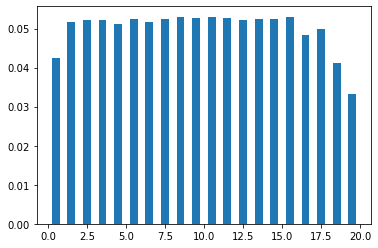

[0.04242531 0.05161747 0.05223617 0.05214778 0.05108715 0.05241294
 0.05170585 0.05250133 0.05285487 0.05276648 0.05303164 0.05258971
 0.05223617 0.05250133 0.05241294 0.05294326 0.04825879 0.04984974
 0.04109952 0.03332155]
Wall time: 6.48 s


In [5]:
%%time
from matplotlib import pyplot as plt

# Histogram for the categories in the training set
priori, _, _ = plt.hist(train_target, bins=len(categories), range=(0,len(categories)), rwidth=0.5, density=True)
plt.show()
print(priori)

In [6]:
print(f'Shape of the priori probability distribution: {priori.shape}')

Shape of the priori probability distribution: (20,)


# Estimación de probabilidades a priori
Se computan las probabilidades a priori para las categorías, es decir, los tópicos. Se emplea una herramienta distinta a **matplotlib** para comparar el tiempo utilizada en el procesamiento. Se está estimando la siguiente función masa de probabilidad,
$$P(X=x) ; x = 0, 1, ..., 19$$

In [7]:
%%time

# For each category, filter the amount of occurences in the training dataset
# the compute the priori probability
priori_distribution = np.zeros(len(categories))
for index, category in enumerate(categories):
    frequency = (train_target == index).sum()
    priori_distribution[index] = frequency
priori_distribution /= priori_distribution.sum()

Wall time: 9.98 ms


### Preprocesamiento

In [8]:
%%time

from sklearn.feature_extraction.text import CountVectorizer

# Importing and testing the CountVectorizer class of sklearn
vectorizer = CountVectorizer(analyzer='word', stop_words='english')
feature_matrix = vectorizer.fit_transform(train_data)

Wall time: 5.12 s


In [9]:
print(feature_matrix.shape)

(11314, 129796)


## Estimación de distribución de probabilidad condicional

In [10]:
%%time

# Separate the matrix of documents (mails) and occurrences of words for each category
# and compute the normalized distribution to get the likelihood for each category
alpha = 1
categories_distribution = np.zeros((len(categories), len(vectorizer.vocabulary_.keys())), dtype=np.longdouble)
for index, category in enumerate(categories):
  category_matrix = feature_matrix[train_target == index][:]
  distribution = category_matrix.sum(axis=0) + alpha
  categories_distribution[index,:] = distribution / distribution.sum()

Wall time: 59.8 ms


In [11]:
print(categories_distribution.shape)
print(categories_distribution)

(20, 129796)
[[1.87142383e-05 1.63749585e-04 4.67855957e-06 ... 4.67855957e-06
  4.67855957e-06 4.67855957e-06]
 [1.63359035e-04 8.40132181e-05 4.66740100e-06 ... 4.66740100e-06
  4.66740100e-06 4.66740100e-06]
 [9.18720277e-05 2.97233031e-05 2.70211846e-06 ... 2.70211846e-06
  2.70211846e-06 2.70211846e-06]
 ...
 [1.23957752e-04 7.54683962e-04 7.29163249e-06 ... 3.64581624e-06
  3.64581624e-06 3.64581624e-06]
 [1.21906620e-04 2.98461034e-04 4.20367654e-06 ... 4.20367654e-06
  4.20367654e-06 4.20367654e-06]
 [2.52340458e-05 9.08425648e-05 5.04680915e-06 ... 5.04680915e-06
  5.04680915e-06 5.04680915e-06]]


## Calculando la prediccion con las probabilidades

In [23]:
%%time

# Data, target and vectorizer
input_size = 100
input_data = test_data[:input_size]
input_target = test_target[:input_size]
input_matrix = vectorizer.transform(input_data)

# Computing predictions for each input
predictions = np.zeros(input_matrix.shape[0], dtype=int)
for input_index in range(input_matrix.shape[0]):
    # Computing the posteriori probability
    # posteriori_unnormalized = ((categories_distribution * 10e3) ** input_matrix.toarray()[input_index]).prod(axis=1) * priori
    posteriori_unnormalized = ((categories_distribution) ** input_matrix.toarray()[input_index]).prod(axis=1) * priori
    posteriori_normalized = posteriori_unnormalized / posteriori_unnormalized.sum()

    # Choosing the maximum posteriori probability as the prediction
    predictions[input_index] = posteriori_unnormalized.argmax()

Wall time: 6.52 s


In [24]:
# Computing the accuracy of the model
accuracy = (predictions == input_target).sum() / input_size
print(f'Accuracy obtained: {accuracy}')

Accuracy obtained: 0.8


# Calculando la predicción usando log probabilidades

In [220]:
%%time

# Log probabilities
log_priori = np.log(priori)
log_prob = np.log(categories_distribution)

# Data, target and vectorizer
input_size = 10#test_size
input_data = test_data[:input_size]
input_target = test_target[:input_size]
input_matrix = vectorizer.transform(input_data)

Wall time: 50 ms


In [221]:
%%time

# Computing the log posteriori probability
log_posteriori = np.dot(log_prob, input_matrix.todense().transpose()) + (log_priori.reshape(-1, 1) * np.ones(input_size))

Wall time: 15 ms


In [222]:
%%time

# Choosing the maximum log posteriori probability as the prediction
predictions = np.zeros(input_matrix.shape[0], dtype=int)
for input_index in range(input_size):
    predictions[input_index] = log_posteriori[:,input_index].argmax()

Wall time: 9.61 ms


In [223]:
# Computing the accuracy of the model
accuracy = (predictions == input_target).sum() / input_size
print(f'Accuracy obtained: {accuracy}')

Accuracy obtained: 0.7
